In [6]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI()

In [4]:
class LLMState(TypedDict):

    question: str
    answer:  str

In [8]:
def llm_qa(state: LLMState) -> LLMState:
    question = state['question']

    prompt = f'Answer the following questions {question}'

    answer = model.invoke(prompt).content

    state['answer'] = answer

    return state

In [9]:
#create our graph
graph = StateGraph(LLMState)

#add nodes
graph.add_node('llm_qa', llm_qa)

#add edge
graph.add_edge(START,'llm_qa')
graph.add_edge('llm_qa', END)


#compile the graph
workflow = graph.compile()

In [10]:
initial_state = {
    'question': 'What is ai?'
}

final_state = workflow.invoke(initial_state)

print(final_state)

{'question': 'What is ai?', 'answer': 'AI, or artificial intelligence, refers to the simulation of human intelligence processes by machines, especially computer systems. It involves the development of algorithms that allow machines to learn from and adapt to data, make decisions, and perform tasks that typically require human intelligence, such as speech recognition, visual perception, and problem-solving. AI technologies have applications in a wide range of industries, including healthcare, finance, transportation, and entertainment.'}


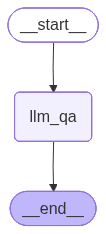

In [11]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())